## Decision Tree - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
10/344

0.029069767441860465

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [10]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df[df["sex"]== "."]

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

In [12]:
df.drop(index=336, inplace=True)

In [13]:
df2 = df.copy()

## Visualization

In [14]:
df["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

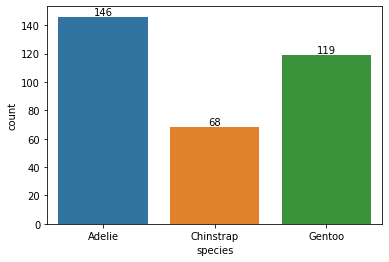

In [15]:
ax = sns.countplot(x="species", data = df)
ax.bar_label(ax.containers[0]);

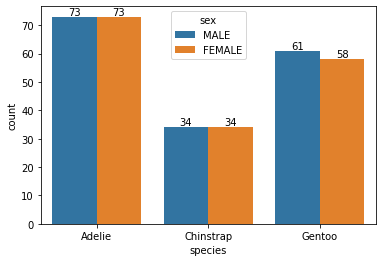

In [16]:
ax = sns.countplot(x="species", hue="sex", data = df)
for p in ax.containers:
    ax.bar_label(p)

<Figure size 864x432 with 0 Axes>

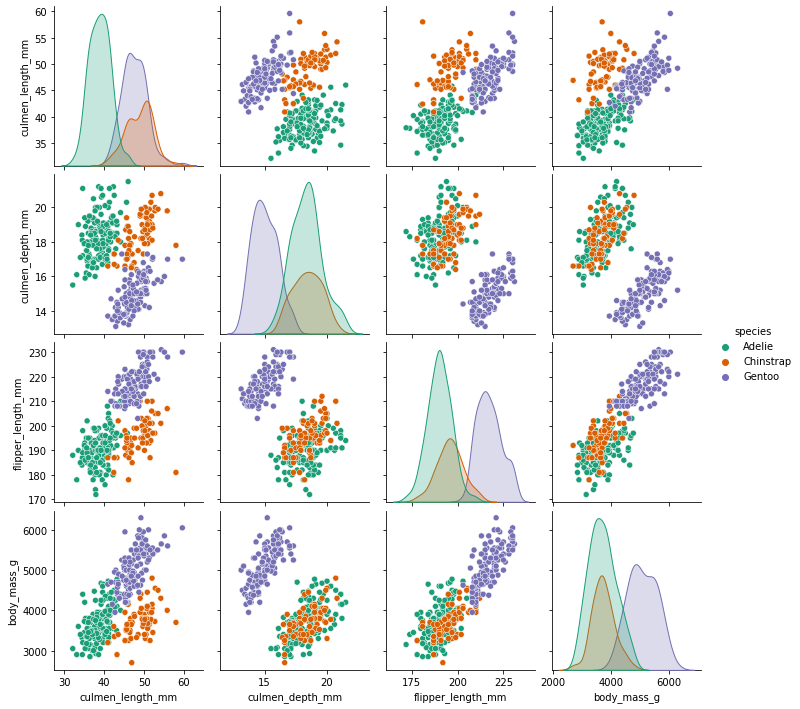

In [17]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')

In [18]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [19]:
# !pip install plotly

In [20]:
import plotly.express as px

In [21]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

In [22]:
df.select_dtypes("number")

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[333 rows x 4 columns]

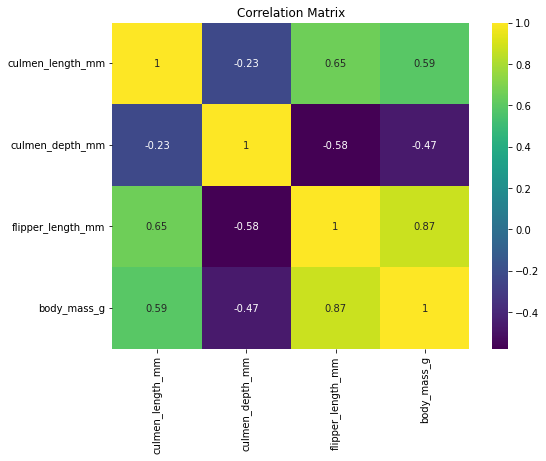

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

## Modeling with Dummies Features

## Train | Test Split

In [24]:
X = df.drop("species", axis =1)
X.head()

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Torgersen              39.1             18.7              181.0   
1  Torgersen              39.5             17.4              186.0   
2  Torgersen              40.3             18.0              195.0   
4  Torgersen              36.7             19.3              193.0   
5  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [25]:
X = pd.get_dummies(X)
y = df['species']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Modelling - Decision Tree Classifier with dummies features

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
DT_model = DecisionTreeClassifier(random_state=101)

In [29]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [30]:
y_pred = DT_model.predict(X_test)

## Model Performance on Classification Tasks

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

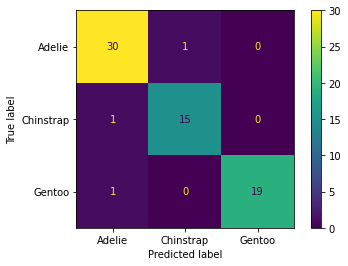

In [33]:
plot_confusion_matrix(DT_model,X_test,y_test)

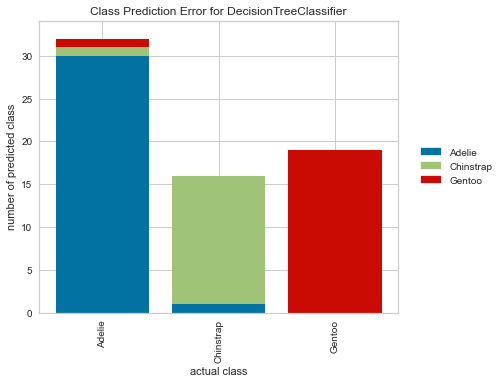

In [34]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [35]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[30  1  0]
 [ 1 15  0]
 [ 1  0 19]]
              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        31
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67


Train_Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



## Cross Validate

In [36]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [37]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.002999    0.002997       0.888889              0.888889   
2   0.002996    0.002012       1.000000              1.000000   
3   0.001997    0.003001       0.888889              0.888889   
4   0.002009    0.003011       1.000000              1.000000   
5   0.002987    0.003000       0.962963              0.962963   
6   0.001986    0.003999       1.000000              1.000000   
7   0.001993    0.003011       1.000000              1.000000   
8   0.001991    0.003007       1.000000              1.000000   
9   0.003000    0.001992       0.961538              0.961538   
10  0.001997    0.004009       0.961538              0.961538   

    test_recall_micro  test_f1_micro  
1            0.888889       0.888889  
2            1.000000       1.000000  
3            0.888889       0.888889  
4            1.000000       1.000000  
5            0.962963       0.962963  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            0.961538       0.961538  
10           0.961538       0.961538

In [38]:
df_scores.mean()[2:]

test_accuracy           0.966382
test_precision_micro    0.966382
test_recall_micro       0.966382
test_f1_micro           0.966382
dtype: float64

## Feature Importances

In [39]:
X_train.head(1)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
314              44.5             14.7              214.0       4850.0   

     island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
314              1             0                 0           1         0

In [40]:
DT_model.feature_importances_

array([0.35128085, 0.01317979, 0.56819371, 0.        , 0.03406964,
       0.03327601, 0.        , 0.        , 0.        ])

In [41]:
df_f_i = pd.DataFrame(data = DT_model.feature_importances_, index=X.columns, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_f_i

Feature Importance
flipper_length_mm            0.568194
culmen_length_mm             0.351281
island_Biscoe                0.034070
island_Dream                 0.033276
culmen_depth_mm              0.013180
body_mass_g                  0.000000
island_Torgersen             0.000000
sex_FEMALE                   0.000000
sex_MALE                     0.000000

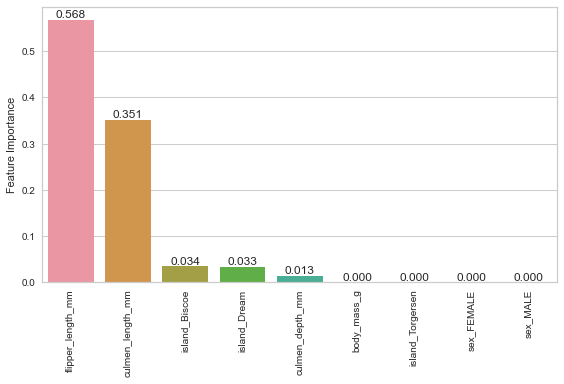

In [42]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.tight_layout()

## Modeling with Nominal Features

## Train | Test Split

In [43]:
X = df2.drop(columns="species")
y = df2['species']

In [44]:
cat = X.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [45]:
X[cat]

island     sex
0    Torgersen    MALE
1    Torgersen  FEMALE
2    Torgersen  FEMALE
4    Torgersen  FEMALE
5    Torgersen    MALE
..         ...     ...
338     Biscoe  FEMALE
340     Biscoe  FEMALE
341     Biscoe    MALE
342     Biscoe  FEMALE
343     Biscoe    MALE

[333 rows x 2 columns]

In [46]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit_transform(X[cat])

array([[2., 1.],
       [2., 0.],
       [2., 0.],
       [2., 0.],
       [2., 1.],
       [2., 0.],
       [2., 1.],
       [2., 0.],
       [2., 1.],
       [2., 1.],
       [2., 0.],
       [2., 0.],
       [2., 1.],
       [2., 0.],
       [2., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.

In [47]:
X[cat] = enc.fit_transform(X[cat])
X[cat]

island  sex
0       2.0  1.0
1       2.0  0.0
2       2.0  0.0
4       2.0  0.0
5       2.0  1.0
..      ...  ...
338     0.0  0.0
340     0.0  0.0
341     0.0  1.0
342     0.0  0.0
343     0.0  1.0

[333 rows x 2 columns]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Modelling with nominal features

In [49]:
DT_model2 = DecisionTreeClassifier(random_state=101)

In [50]:
DT_model2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [51]:
y_pred = DT_model2.predict(X_test)

## Model Performance on Classification Tasks

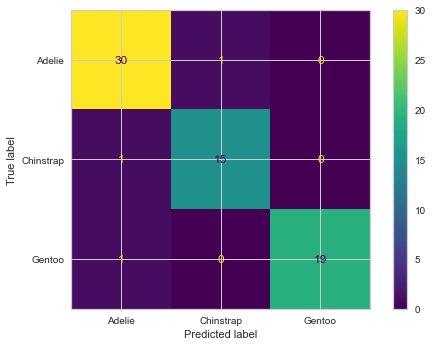

In [52]:
plot_confusion_matrix(DT_model2,X_test,y_test)

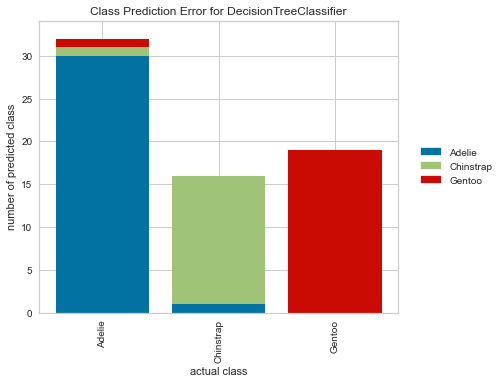

In [53]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model2)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [54]:
eval_metric(DT_model2, X_train, y_train, X_test, y_test)

Test_Set
[[30  1  0]
 [ 1 15  0]
 [ 1  0 19]]
              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        31
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67


Train_Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



In [55]:
## Cross Validate

In [56]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.002001    0.003002       0.925926              0.925926   
2   0.001995    0.002000       1.000000              1.000000   
3   0.001997    0.003006       0.925926              0.925926   
4   0.001000    0.003011       1.000000              1.000000   
5   0.001991    0.003008       0.962963              0.962963   
6   0.002001    0.004005       1.000000              1.000000   
7   0.001991    0.003000       1.000000              1.000000   
8   0.002012    0.002006       0.961538              0.961538   
9   0.001017    0.002983       0.961538              0.961538   
10  0.002016    0.001997       0.961538              0.961538   

    test_recall_micro  test_f1_micro  
1            0.925926       0.925926  
2            1.000000       1.000000  
3            0.925926       0.925926  
4            1.000000       1.000000  
5            0.962963       0.962963  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            0.961538       0.961538  
9            0.961538       0.961538  
10           0.961538       0.961538

In [57]:
df_scores.mean()[2:]

test_accuracy           0.969943
test_precision_micro    0.969943
test_recall_micro       0.969943
test_f1_micro           0.969943
dtype: float64

## Feature İmportances with nominal features

In [58]:
DT_model2.feature_importances_

array([0.06734565, 0.35128085, 0.01317979, 0.54456291, 0.        ,
       0.02363079])

In [59]:
df_f_i2 = pd.DataFrame(data = DT_model2.feature_importances_, index=X.columns, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_f_i2

Feature Importance
flipper_length_mm            0.544563
culmen_length_mm             0.351281
island                       0.067346
sex                          0.023631
culmen_depth_mm              0.013180
body_mass_g                  0.000000

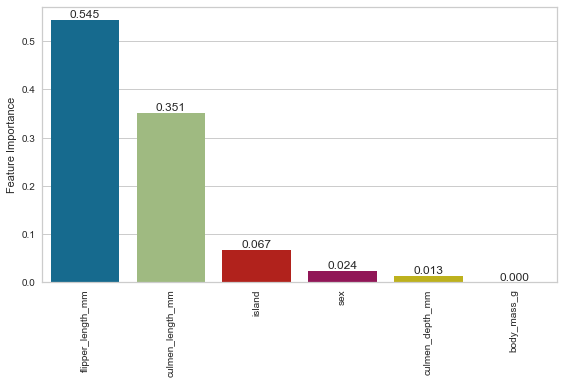

In [60]:
ax = sns.barplot(x = df_f_i2.index, y = 'Feature Importance', data = df_f_i2)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.tight_layout()

## Drop most important feature

In [61]:
X2 = X.drop(columns = ["flipper_length_mm"]) 
# The feature that weighs too much on the estimate can sometimes cause overfitting. For this reason, the most important feature can be dropped and the scores can be checked again

In [62]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [63]:
DT_model3 = DecisionTreeClassifier(random_state=101)

In [64]:
DT_model3.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [65]:
eval_metric(DT_model3, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[39  1  0]
 [ 1 26  0]
 [ 0  0 33]]
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


Train_Set
[[106   0   0]
 [  0  41   0]
 [  0   0  86]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       106
   Chinstrap       1.00      1.00      1.00        41
      Gentoo       1.00      1.00      1.00        86

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [66]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.004989    0.004008       1.000000              1.000000   
2   0.002993    0.002996       1.000000              1.000000   
3   0.001003    0.003001       0.958333              0.958333   
4   0.001996    0.002024       1.000000              1.000000   
5   0.002000    0.002998       1.000000              1.000000   
6   0.001993    0.002010       0.956522              0.956522   
7   0.002011    0.002004       1.000000              1.000000   
8   0.001000    0.002988       1.000000              1.000000   
9   0.001996    0.002012       1.000000              1.000000   
10  0.000988    0.002995       1.000000              1.000000   

    test_recall_micro  test_f1_micro  
1            1.000000       1.000000  
2            1.000000       1.000000  
3            0.958333       0.958333  
4            1.000000       1.000000  
5            1.000000       1.000000  
6            0.956522       0.956522  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            1.000000       1.000000  
10           1.000000       1.000000

In [67]:
df_scores.mean()[2:]

test_accuracy           0.991486
test_precision_micro    0.991486
test_recall_micro       0.991486
test_f1_micro           0.991486
dtype: float64

In [68]:
from sklearn.metrics import make_scorer

In [69]:
scoring = {'precision-Adelie-Chinstrap': make_scorer(precision_score,  average="weighted", labels=["Adelie", "Chinstrap"]),
           'recall-Adelie-Chinstrap': make_scorer(recall_score, average="weighted", labels =["Adelie", "Chinstrap"]),
           'f1-Adelie-Chinstrap': make_scorer(f1_score, average="weighted", labels = ["Adelie", "Chinstrap"])
          
          }

In [70]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie-Chinstrap    0.988556
test_recall-Adelie-Chinstrap       0.993333
test_f1-Adelie-Chinstrap           0.990357
dtype: float64

## Visualize the Tree

In [71]:
from sklearn.tree import plot_tree

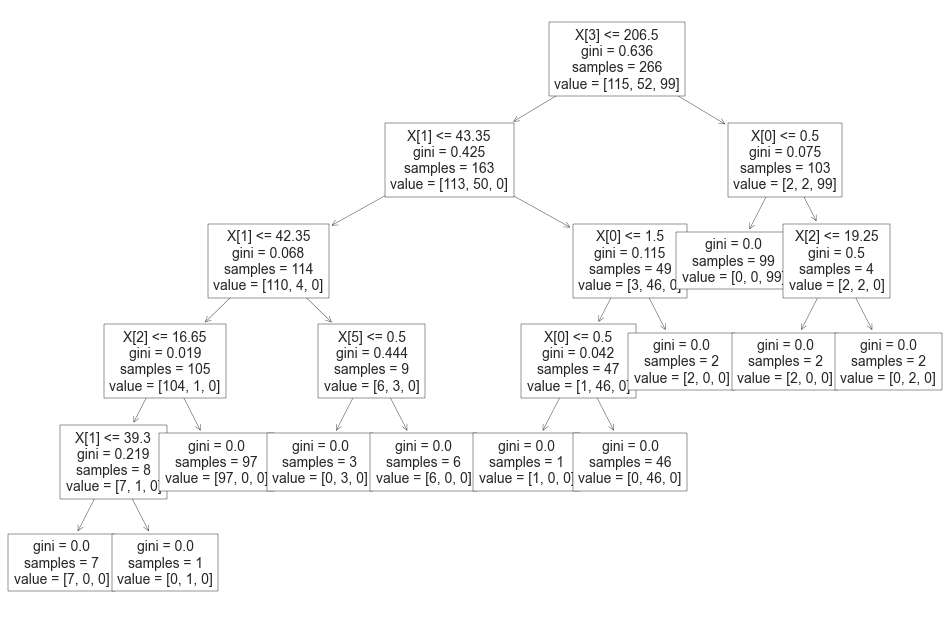

In [72]:
plt.figure(figsize=(12,8), dpi=100)
plot_tree(DT_model2, fontsize=10);

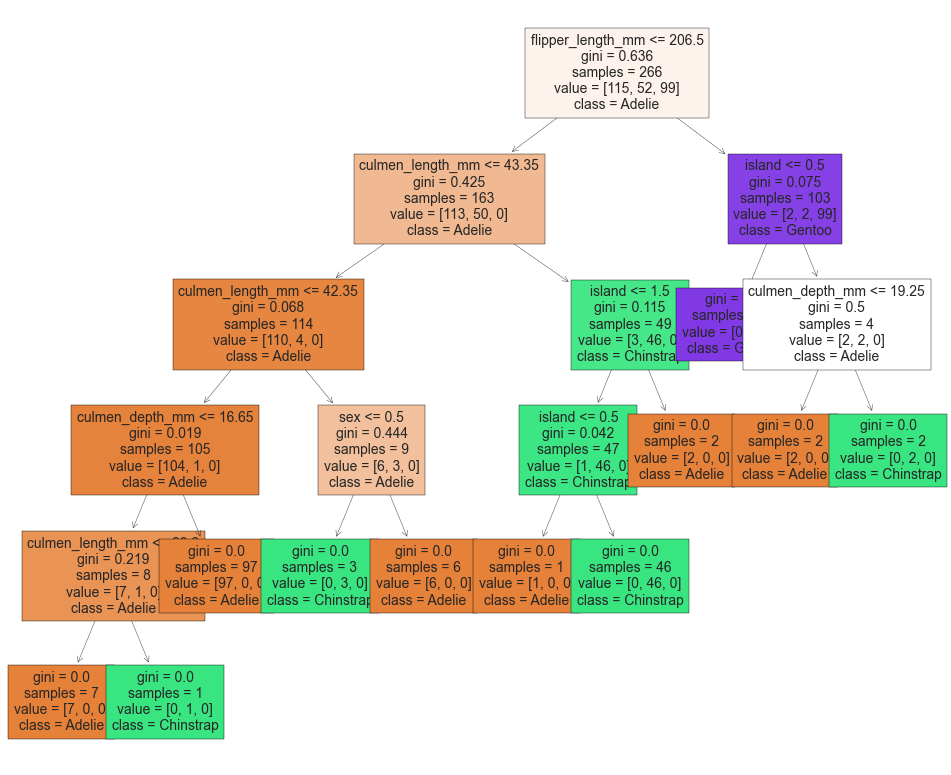

In [73]:
plt.figure(figsize=(12,10),dpi=100)
plot_tree(DT_model2, filled=True, feature_names=X.columns, class_names=df2.species.unique(), fontsize=10);

## Understanding Hyperparameters

### Max depth, min samples split, min samples leaf

In [74]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df2.species.unique(), fontsize=10);

In [75]:
pruned_tree = DecisionTreeClassifier(max_depth=None, random_state=101,  min_samples_split=7,min_samples_leaf=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=7,
                       random_state=101)



Test Set
[[30  1  0]
 [ 3 13  0]
 [ 1  0 19]]


              precision    recall  f1-score   support

      Adelie       0.88      0.97      0.92        31
   Chinstrap       0.93      0.81      0.87        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.93        67
   macro avg       0.94      0.91      0.92        67
weighted avg       0.93      0.93      0.92        67



Train Set
[[115   0   0]
 [  4  48   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98       115
   Chinstrap       1.00      0.92      0.96        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           0.98       266
   macro avg       0.99      0.97      0.98       266
weighted avg       0.99      0.98      0.98       266



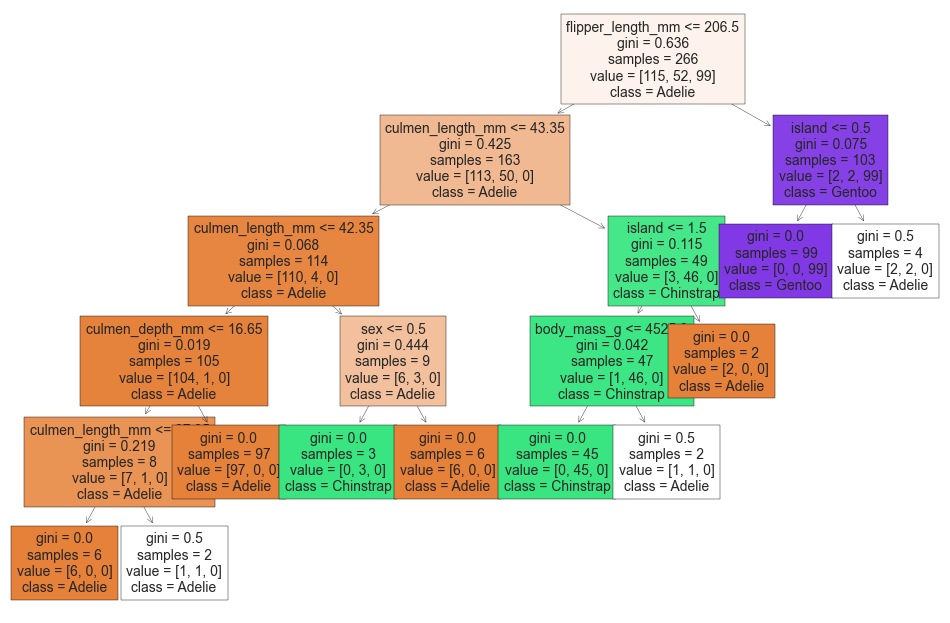

In [76]:
report_model(pruned_tree)

### Max Leaf Nodes

In [77]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)
pruned_tree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)



Test Set
[[30  1  0]
 [ 1 15  0]
 [ 1  0 19]]


              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        31
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67



Train Set
[[115   0   0]
 [  4  48   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98       115
   Chinstrap       1.00      0.92      0.96        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           0.98       266
   macro avg       0.99      0.97      0.98       266
weighted avg       0.99      0.98      0.98       266



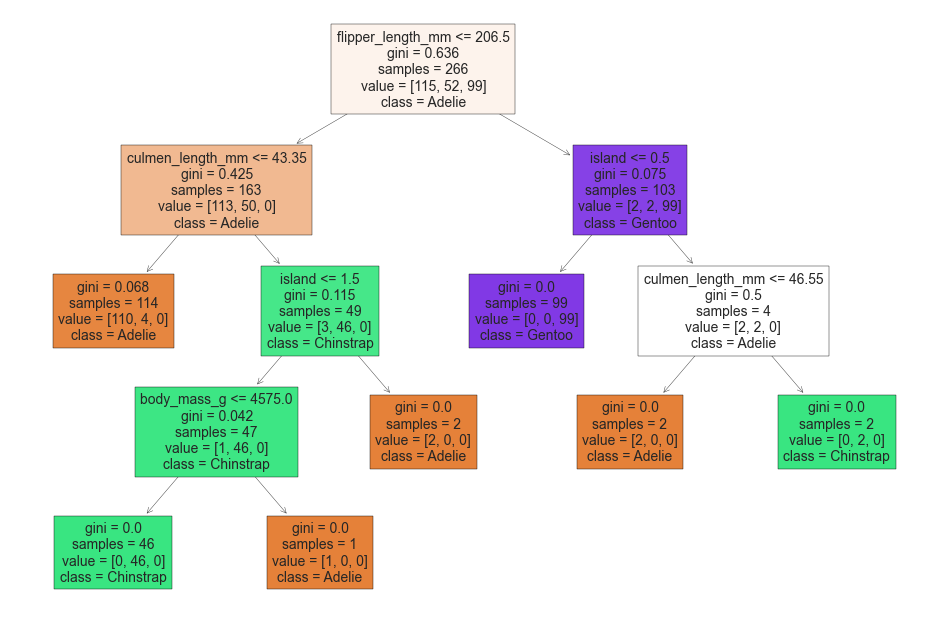

In [78]:
report_model(pruned_tree_2)

## Criterion

In [79]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=101)
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)



Test Set
[[30  1  0]
 [ 1 15  0]
 [ 1  0 19]]


              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        31
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67



Train Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



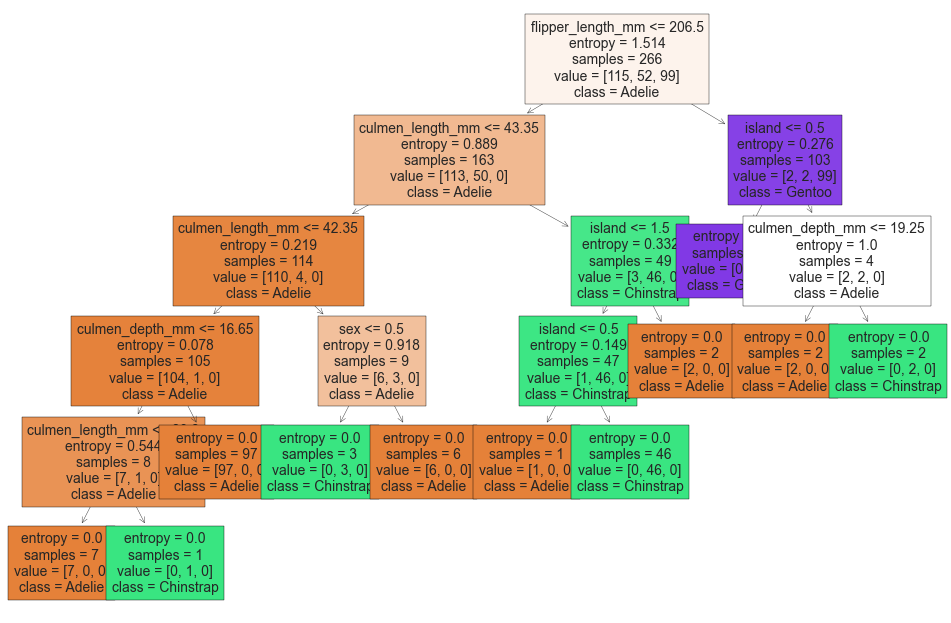

In [80]:
report_model(entropy_tree)

## Max_features, Splitter

In [81]:
tree = DecisionTreeClassifier(splitter = "random", max_features=None)
tree.fit(X_train,y_train)

DecisionTreeClassifier(splitter='random')



Test Set
[[29  2  0]
 [ 0 16  0]
 [ 0  0 20]]


              precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        31
   Chinstrap       0.89      1.00      0.94        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.97        67
   macro avg       0.96      0.98      0.97        67
weighted avg       0.97      0.97      0.97        67



Train Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



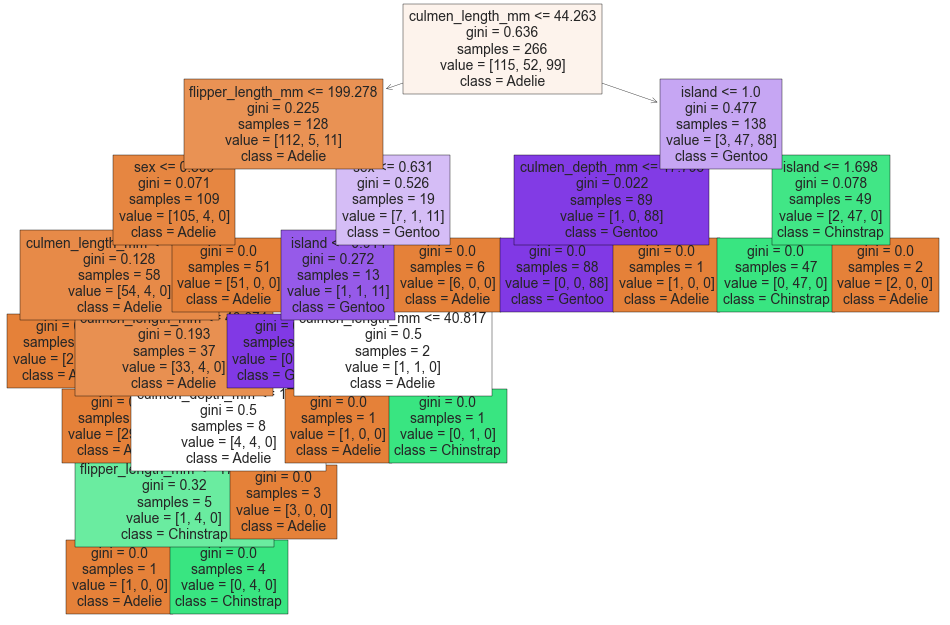

In [82]:
report_model(tree)

## Find Best Parameters

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
model = DecisionTreeClassifier(random_state=101)

In [85]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [86]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [87]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [88]:
grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [89]:
grid_model.best_estimator_

DecisionTreeClassifier(random_state=101)

In [90]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[39  1  0]
 [ 1 26  0]
 [ 0  0 33]]
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


Train_Set
[[106   0   0]
 [  0  41   0]
 [  0   0  86]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       106
   Chinstrap       1.00      1.00      1.00        41
      Gentoo       1.00      1.00      1.00        86

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



## Final Model

In [92]:
X = df2.drop(columns=["species","flipper_length_mm"])
y = df2['species']

In [93]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer((OrdinalEncoder(), cat), remainder="passthrough")

In [94]:
X.head()

island  culmen_length_mm  culmen_depth_mm  body_mass_g     sex
0  Torgersen              39.1             18.7       3750.0    MALE
1  Torgersen              39.5             17.4       3800.0  FEMALE
2  Torgersen              40.3             18.0       3250.0  FEMALE
4  Torgersen              36.7             19.3       3450.0  FEMALE
5  Torgersen              39.3             20.6       3650.0    MALE

In [95]:
pd.DataFrame(column_trans.fit_transform(X))

0    1     2     3       4
0    2.0  1.0  39.1  18.7  3750.0
1    2.0  0.0  39.5  17.4  3800.0
2    2.0  0.0  40.3  18.0  3250.0
3    2.0  0.0  36.7  19.3  3450.0
4    2.0  1.0  39.3  20.6  3650.0
..   ...  ...   ...   ...     ...
328  0.0  0.0  47.2  13.7  4925.0
329  0.0  0.0  46.8  14.3  4850.0
330  0.0  1.0  50.4  15.7  5750.0
331  0.0  0.0  45.2  14.8  5200.0
332  0.0  1.0  49.9  16.1  5400.0

[333 rows x 5 columns]

In [96]:
from sklearn.pipeline import Pipeline

In [97]:
operations = [("transformer", column_trans), ("tree", DecisionTreeClassifier(random_state=101))]

In [98]:
pipe_model = Pipeline(steps=operations)

In [99]:
pipe_model.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('tree', DecisionTreeClassifier(random_state=101))])

## Prediction

In [100]:
df.describe().T

count         mean         std     min     25%     50%  \
culmen_length_mm   333.0    43.992793    5.468668    32.1    39.5    44.5   
culmen_depth_mm    333.0    17.164865    1.969235    13.1    15.6    17.3   
flipper_length_mm  333.0   200.966967   14.015765   172.0   190.0   197.0   
body_mass_g        333.0  4207.057057  805.215802  2700.0  3550.0  4050.0   

                      75%     max  
culmen_length_mm     48.6    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4775.0  6300.0

In [101]:
samples = {"island": ["Torgersen", "Biscoe"],
           "culmen_length_mm": [33, 48],
           "culmen_depth_mm":[14,19],
           'flipper_length_mm':[172, 197],
           'body_mass_g': [2800,4050],
           "sex":["MALE","FEMALE"]}

In [102]:
df_samples = pd.DataFrame(samples)
df_samples

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Torgersen                33               14                172   
1     Biscoe                48               19                197   

   body_mass_g     sex  
0         2800    MALE  
1         4050  FEMALE

In [106]:
pd.DataFrame(column_trans.transform(df_samples))

0    1     2     3       4
0  2.0  1.0  33.0  14.0  2800.0
1  0.0  0.0  48.0  19.0  4050.0

In [103]:
pipe_model.predict(df_samples)

array(['Gentoo', 'Adelie'], dtype=object)